# Performance Test 000

In [2]:
import sys, os

sys.path.append(os.path.abspath(".."))

In [3]:
from src.node import Node
from src.node_lr import NodeLR
from src.linked_lists import  LinkedList
from src.doubly_linked_lists import DoublyLinkedList
from src.heaps import MaxHeap
from src.hash_tables import HashTable
from src.recursive_binary_search_trees import BinarySearchTree
from src.stacks_queues import Stack,Queue
from src.has_performance import HasPerformance
from src.recursive_binary_search_trees_traversal import BinarySearchTreeTraversal
from src.graphs import Graph

In [4]:
n_iterations = 30000

In [5]:
def get_hp() -> HasPerformance:
    return HasPerformance()


def get_mh() -> MaxHeap:
    return MaxHeap()


def get_dll() -> DoublyLinkedList:
    return DoublyLinkedList(None)


def get_r_bst() -> BinarySearchTree:
    return BinarySearchTree()

In [6]:
res_hp = get_hp()


def test_get_dll():
    for i in range(n_iterations):
        get_dll().append(i)
        res_hp.save(f"{get_dll().id}; has added {i}")


def test_get_mh():
    for i in range(n_iterations):
        get_mh().insert(i)
        res_hp.save(f"{get_mh().id}; has added  {i}")


def test_get_r_bst():
    for i in range(n_iterations):
        get_r_bst().insert(i)
        res_hp.save(f"{get_r_bst().id}; has added  {i}")


test_get_dll()
test_get_mh()
test_get_r_bst()

In [7]:
import pandas as pd

df = res_hp.con.sql(
    """
SELECT 
    split_part(s, ';', 1) as name,
    min(created_at) min_time,
    max(created_at) max_time,
    COUNT(id) as count
FROM tbl
GROUP BY 1
"""
).df()
df.dtypes

name                object
min_time    datetime64[us]
max_time    datetime64[us]
count                int64
dtype: object

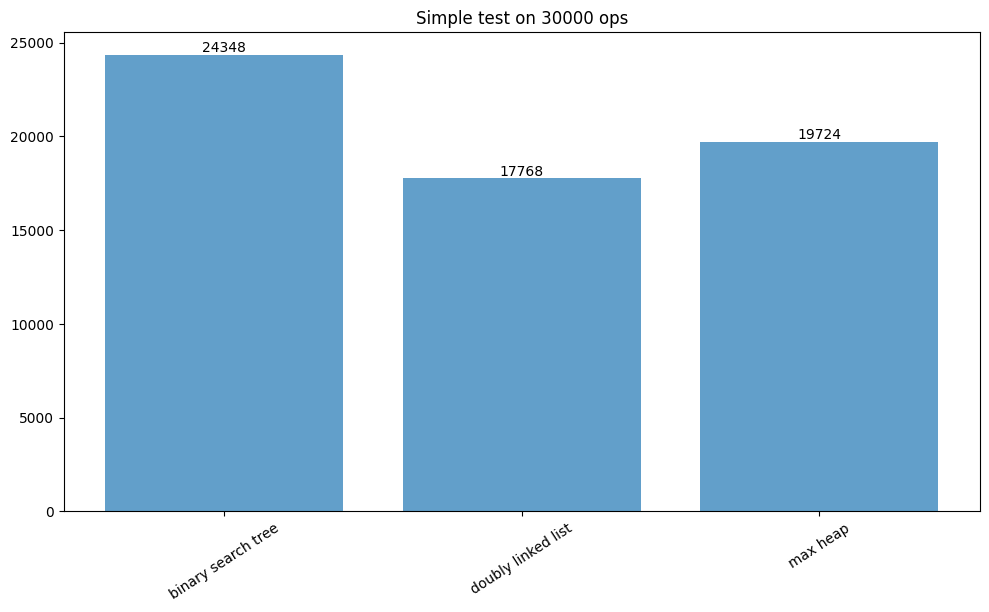

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df["durations"] = (df["max_time"] - df["min_time"]).dt.total_seconds() * 1000

plt.figure(figsize=(10, 6))

bars = plt.bar(df["name"], df["durations"], capsize=5, alpha=0.7)

plt.xticks(rotation=33)

plt.tight_layout()
plt.bar_label(bars)
plt.title(f"Simple test on {n_iterations} ops")


plt.show()